In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

# 从硬盘读取数据进入内存
df = pd.read_excel("Molecular_Descriptor.xlsx")
df1 = pd.read_excel("ADMET.xlsx")

In [2]:
#方差过滤

count = 0
column = []

for j in range(df.shape[1] - 1):
    if df.iloc[:,j + 1].std() == 0:
        column.append(j + 1)

#for i in column:
df.drop(labels = df.columns[column], axis= 1, inplace = True)

In [3]:
#特征选择

import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['SMILES'],axis = 1).values
y = df1['Caco-2'].values

# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier #分类

feature_name = df.drop(['SMILES'],axis = 1).columns
rfc = RandomForestClassifier(n_estimators=60, random_state=0) # 随机森林实例化
# 训练
rfc = rfc.fit(Xtrain,Ytrain)
# 得分
score_Random_Forest = rfc.score(Xtest,Ytest)
print(score_Random_Forest)

r = [*zip(feature_name,rfc.feature_importances_)]
r.sort(key=lambda x:x[1],reverse = True)
r

0.9055649241146712


[('SP-1', 0.04929765636023942),
 ('MW', 0.044253083374380546),
 ('ETA_Beta_s', 0.032807909567673536),
 ('ETA_Alpha', 0.032563893267573425),
 ('nBonds', 0.02430491165587811),
 ('MLFER_L', 0.02200575365433758),
 ('WTPT-1', 0.021509684431771633),
 ('McGowan_Volume', 0.01810880827086514),
 ('ETA_Beta', 0.01810854115041318),
 ('sumI', 0.018045949345601713),
 ('ETA_Eta_R', 0.016002339312639738),
 ('WPATH', 0.01387000860621939),
 ('apol', 0.013272910720157648),
 ('ECCEN', 0.013220671282297095),
 ('ETA_Eta_R_L', 0.0125171813311601),
 ('SP-2', 0.012294356805412267),
 ('nBonds2', 0.012230631013161129),
 ('ATSm2', 0.0106705414192454),
 ('SP-0', 0.010552256017085693),
 ('ETA_Eta_F', 0.010367143335492351),
 ('ETA_Eta_F_L', 0.008942539970174754),
 ('Kier1', 0.008859414620753093),
 ('Zagreb', 0.008649119903062918),
 ('ATSm1', 0.008514029818352493),
 ('minaaO', 0.008395947606752262),
 ('VP-1', 0.00836201751002407),
 ('nHeavyAtom', 0.008102672274933002),
 ('ATSm3', 0.008069211249546177),
 ('maxaaO', 0.

In [4]:
#特征个数选择

count = []

for i in range(60):
    count.append(r[i][0])

count

['SP-1',
 'MW',
 'ETA_Beta_s',
 'ETA_Alpha',
 'nBonds',
 'MLFER_L',
 'WTPT-1',
 'McGowan_Volume',
 'ETA_Beta',
 'sumI',
 'ETA_Eta_R',
 'WPATH',
 'apol',
 'ECCEN',
 'ETA_Eta_R_L',
 'SP-2',
 'nBonds2',
 'ATSm2',
 'SP-0',
 'ETA_Eta_F',
 'ETA_Eta_F_L',
 'Kier1',
 'Zagreb',
 'ATSm1',
 'minaaO',
 'VP-1',
 'nHeavyAtom',
 'ATSm3',
 'maxaaO',
 'VP-0',
 'Kier3',
 'ATSp2',
 'ATSp1',
 'ETA_Shape_P',
 'FMF',
 'SaaO',
 'nwHBa',
 'nAtom',
 'nHaaCH',
 'naaO',
 'MLFER_S',
 'nBondsS',
 'VABC',
 'TopoPSA',
 'BCUTc-1h',
 'fragC',
 'MLFER_E',
 'MDEC-12',
 'nBondsS2',
 'WTPT-3',
 'SsCH3',
 'nAromBond',
 'naAromAtom',
 'SCH-6',
 'SP-4',
 'MAXDN2',
 'SHaaCH',
 'DELS',
 'ETA_Shape_Y',
 'minHBint5']

In [5]:
#将数据划分为标签和特征

X = df[count].values
y = df1['Caco-2'].values


from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# 划分训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 模型训练
gbm = LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=80)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)

'''
# 模型存储
joblib.dump(gbm, 'loan_model.pkl')
# 模型加载
gbm = joblib.load('loan_model.pkl')
'''

# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

# 模型评估
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))

# 特征重要度 print('Feature importances:', list(gbm.feature_importances_))

# 网格搜索，参数调优
estimator = LGBMClassifier(num_leaves=31)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40, 50, 60, 80]
}
gbm = GridSearchCV(estimator, param_grid)
gbm.fit(X_train, y_train)
print('Best parameters found by grid search are:', gbm.best_params_)


D:\DevelopmentTool\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.604039
[2]	valid_0's binary_logloss: 0.559216
[3]	valid_0's binary_logloss: 0.521975
[4]	valid_0's binary_logloss: 0.491538
[5]	valid_0's binary_logloss: 0.466121
[6]	valid_0's binary_logloss: 0.444018
[7]	valid_0's binary_logloss: 0.42475
[8]	valid_0's binary_logloss: 0.407974
[9]	valid_0's binary_logloss: 0.393872
[10]	valid_0's binary_logloss: 0.383791
[11]	valid_0's binary_logloss: 0.372401
[12]	valid_0's binary_logloss: 0.361748
[13]	valid_0's binary_logloss: 0.352518
[14]	valid_0's binary_logloss: 0.344951
[15]	valid_0's binary_logloss: 0.337801
[16]	valid_0's binary_logloss: 0.333229
[17]	valid_0's binary_logloss: 0.327764
[18]	valid_0's binary_logloss: 0.322179
[19]	valid_0's binary_logloss: 0.318444
[20]	valid_0's binary_logloss: 0.312766
[21]	valid_0's binary_logloss: 0.308135
[22]	valid_0's binary_logloss: 0.306069
[23]	valid_0's binary_logloss: 0.302438
[24]	valid_0's binary_logloss: 0.299103
[25]	valid_0's binary_logloss: 0.29637
[26]	valid_

In [6]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

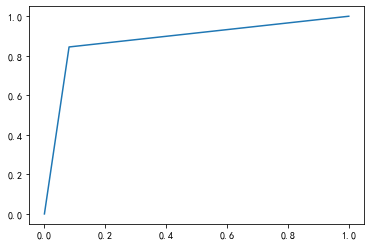

In [7]:
#ROC曲线
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thres = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

In [8]:
#AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,y_pred)
score

0.8818114673377833